In [1]:
import pandas as pd
import numpy as np
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
df = pd.read_csv('/Users/goundosidibe/Downloads/amazon_reviews.csv')

#changing column names
df.columns = ['id','customer','title','stars','review','date']
df.head(5)

,id,customer,title,stars,review,date
0,0,witch,One Star,1.0,"Thanks but no thanks, I'm not willing to pay t...",5 February 2017
1,1,Smith & Jones,The worst thing for me since mandatory Video w...,1.0,I dropped Amazon Prime due to the massive hike...,9 May 2017
2,2,Zahid,Love concept! But not currently value for money.,2.0,"Don't get me wrong, I am really enjoying liste...",17 January 2016
3,3,Shazebee,Imagine if Netflix used this concept. £8 for 1...,1.0,Currently trialing it but wont be continuing! ...,7 March 2017
4,4,Kieren Geaney,Good but a bit too expensive for whats on offer.,2.0,I finished a book in 2 weeks and am not allowe...,19 May 2017


In [3]:
sentences = df['review']
labels = df["stars"]

In [4]:
df.shape

(580, 6)

In [5]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 300

In [6]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [7]:
# x_val = sentences[200:training_sentences]
# partial_x_train = sentences[training_sentences:]
# y_val = labels[200:training_labels]
# partial_y_trains = labels[training_labels:]

In [8]:
training_sentences.shape

(300,)

In [9]:
testing_sentences.shape

(280,)

In [10]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [11]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [14]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
10/10 - 0s - loss: 0.6459 - accuracy: 0.6800 - val_loss: 0.4637 - val_accuracy: 0.3393
Epoch 2/10
10/10 - 0s - loss: 0.5640 - accuracy: 0.6833 - val_loss: 0.2675 - val_accuracy: 0.3393
Epoch 3/10
10/10 - 0s - loss: 0.4673 - accuracy: 0.6833 - val_loss: 0.0238 - val_accuracy: 0.3393
Epoch 4/10
10/10 - 0s - loss: 0.3463 - accuracy: 0.6833 - val_loss: -2.7005e-01 - val_accuracy: 0.3393
Epoch 5/10
10/10 - 0s - loss: 0.1996 - accuracy: 0.6833 - val_loss: -6.7044e-01 - val_accuracy: 0.3393
Epoch 6/10
10/10 - 0s - loss: 0.0193 - accuracy: 0.6833 - val_loss: -1.1596e+00 - val_accuracy: 0.3393
Epoch 7/10
10/10 - 0s - loss: -2.0937e-01 - accuracy: 0.6833 - val_loss: -1.7370e+00 - val_accuracy: 0.3393
Epoch 8/10
10/10 - 0s - loss: -4.6199e-01 - accuracy: 0.6833 - val_loss: -2.4666e+00 - val_accuracy: 0.3393
Epoch 9/10
10/10 - 0s - loss: -7.7583e-01 - accuracy: 0.6833 - val_loss: -3.3052e+00 - val_accuracy: 0.3393
Epoch 10/10
10/10 - 0s - loss: -1.1109e+00 - accuracy: 0.6833 - val_loss:

In [15]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

#     plot_graphs(history, "accuracy")
#     plot_graphs(history, "loss")

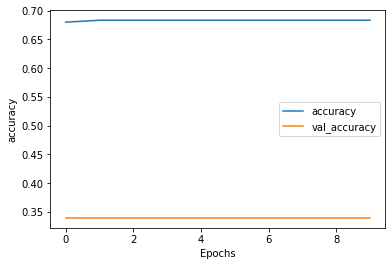

In [16]:
plot_graphs(history, "accuracy")

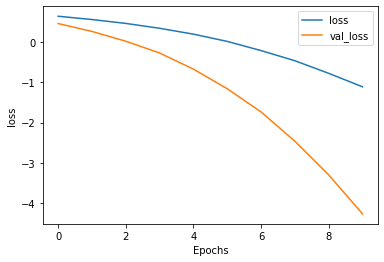

In [17]:
plot_graphs(history, "loss")